In [4]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd, "/mission_control/helpers/figures/sn_five_themes.R"))

library(tidyverse)
library(gridExtra)
library(ggpubr)

### 0 - Prepare plots

In [5]:
name_map <- list("1" = "T-cell Low", "2" = "T-cell Medium", "3" = "T-cell High")

In [17]:
ready <- (
    readRDS(paste0(TMP_DIR, "validation-ready.Rds")) 
        %>% filter(Study == "HMF-CPCT")
        %>% select(bor, tissue, tcell, tgfb)
        %>% mutate(bor = ifelse(bor == 1, "Responder", "Non-Responder"),
                   tissue = factor(str_to_title(tissue), levels = c("Skin", "Lung", "Bladder", "Other")))        
        %>% drop_na(tcell, bor)
        %>% mutate(tcell_group = as.character(ntile(tcell, 3)))
        %>% rowwise()
        %>% mutate( tcell_nice = factor(name_map[[tcell_group]], levels = c("T-cell Low", "T-cell Medium", "T-cell High")))
        %>% ungroup()
        %>% mutate( pan = "Pan-Cancer")
)         

In [73]:
overall <- (
    ggplot( data = ready, 
       aes( x = as.factor(bor), 
            y = tgfb, 
            fill = bor)) 
     + geom_violin() 
     + geom_boxplot(fill = "white", width = .5) 
     + stat_compare_means(vjust = 1)
)
overall_go <- overall + facet_wrap(~pan, ncol = 1) + scale_x_discrete(guide = guide_axis(n.dodge=2)) + ylab("Log(TGFB cluster + 1)")
tissues <- overall + facet_wrap(~tissue, ncol = 2) + scale_x_discrete(guide = guide_axis(n.dodge=2))
tcell <- overall + facet_wrap(~tcell_nice, ncol = 3) + scale_x_discrete(guide = guide_axis(n.dodge=2))

### 1 - Add themes 

In [78]:
base_theme <- theme_classic(base_size = 20) 
theme1 <- (
    base_theme 
        + theme(plot.margin = unit(c(0,0,0,0), "cm"), 
                axis.text = element_text(size = 16), 
                axis.title = element_text(size = 18), 
                axis.title.x = element_blank(), 
                plot.title = element_text(hjust = .5, size = 20), 
                legend.position = "none")
)        
theme2 <- theme1 + theme(axis.title.y = element_blank(), axis.text.x = element_text(size = 12))

### 2 - Final touch

In [96]:
options(repr.plot.width = 16, repr.plot.height = 7)

In [97]:
layout <- rbind(c(1,1,2,2,2,3,3,3,3))

In [98]:
lets_go <- as_ggplot(arrangeGrob( overall_go + theme1, 
                  tissues + theme2, 
                  tcell + theme2, layout_matrix = layout)
)

In [100]:
FIG_FINAL_DIR

[1] "/workspace/projects/immune_biomarkers/final_figures/"

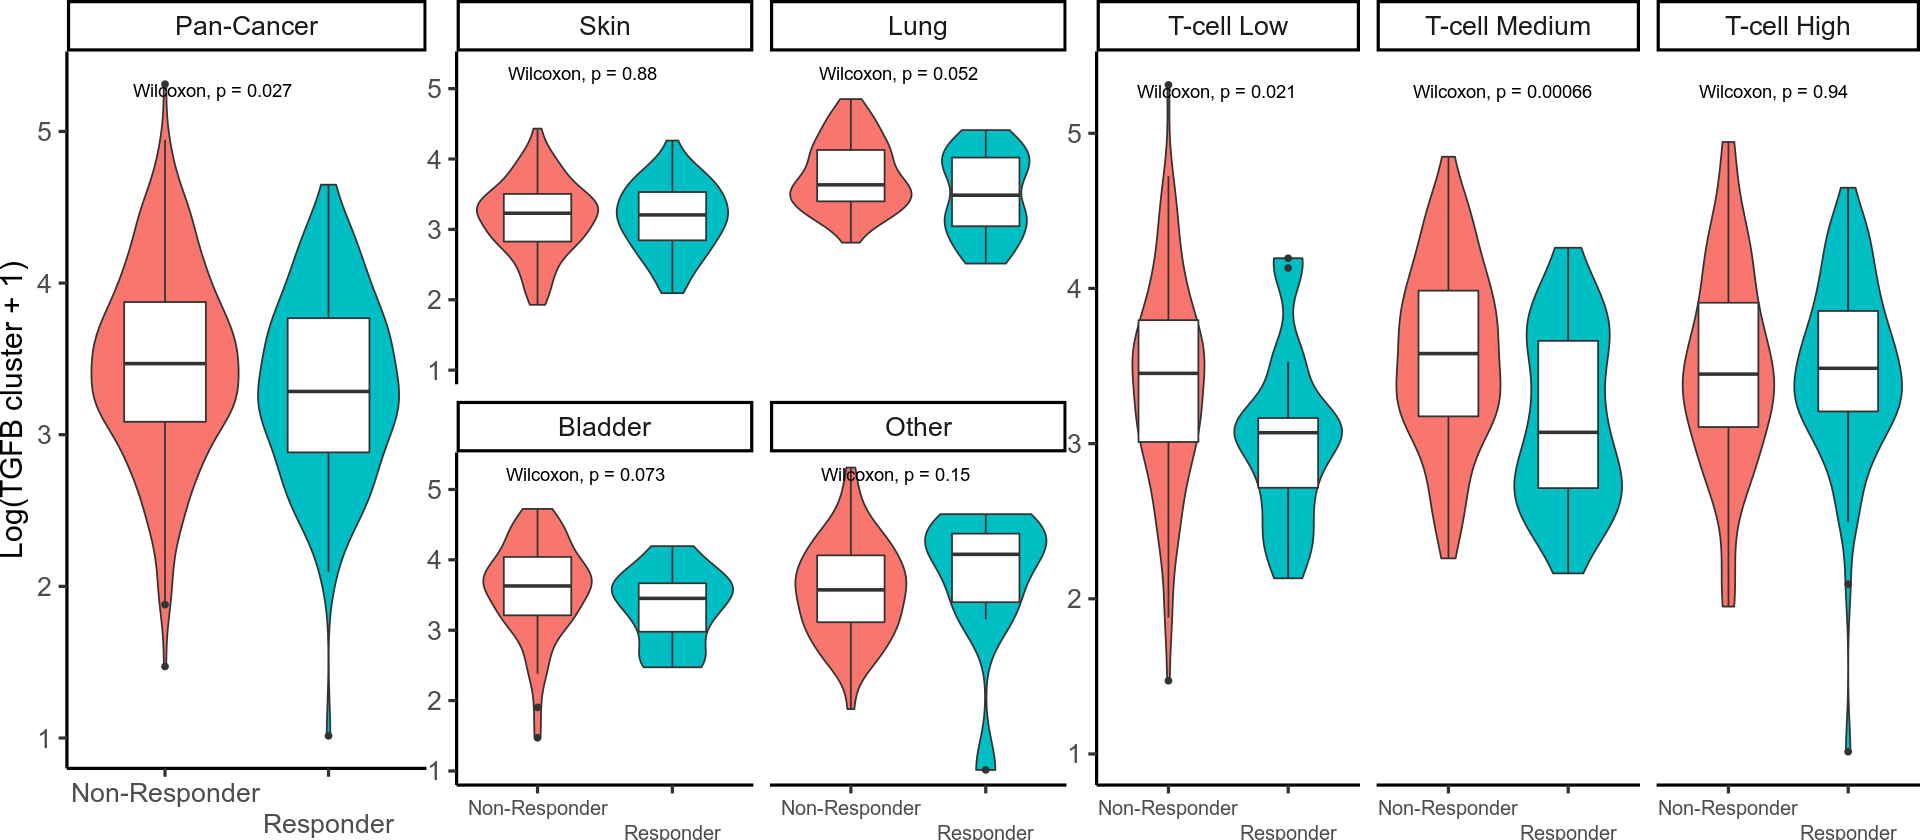

In [99]:
lets_go
ggsave(file = paste0(FIG_FINAL_DIR, "8_tgfb_by_tcell.png"), 
       width = 16, height = 7)